<a href="https://colab.research.google.com/github/Diva015/Cats-vs-Dogs-Image-Classifier-Using-CNN-with-TensorFlow-/blob/main/Cats_vs_Dogs_Image_Classifier(Using_CNN_with_TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.JRLAK4_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 961s 2s/step - accuracy: 0.6023 - loss: 0.7411 - val_accuracy: 0.7285 - val_loss: 0.5469
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 980s 2s/step - accuracy: 0.7478 - loss: 0.5127 - val_accuracy: 0.7704 - val_loss: 0.4999
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 942s 2s/step - accuracy: 0.8259 - loss: 0.3885 - val_accuracy: 0.7715 - val_loss: 0.5366
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 959s 2s/step - accuracy: 0.8954 - loss: 0.2515 - val_accuracy: 0.7670 - val_loss: 0.6583
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.9548 - loss: 0.1219 - val_accuracy: 0.7586 - val_loss: 1.0090
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


/tmp/ipython-input-1691528490.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {class_names[int(preds[i] > 0.5)]} | Actual: {class_names[labels[i]]}")


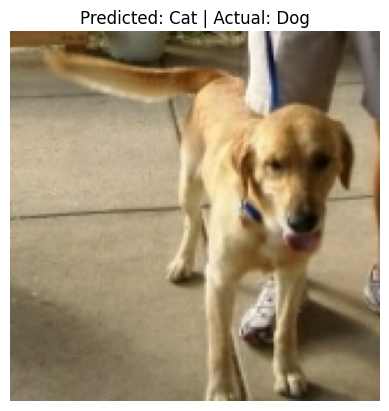

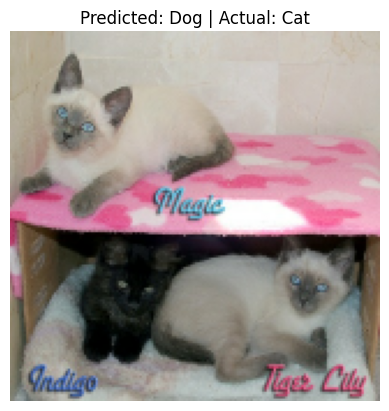

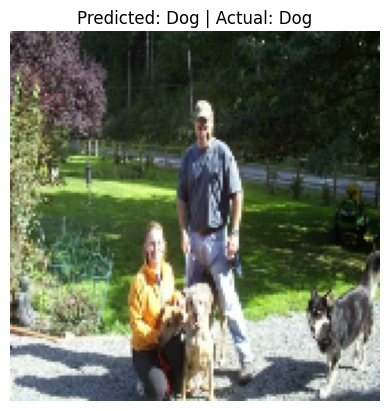

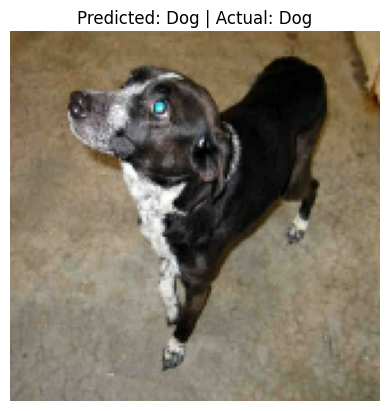

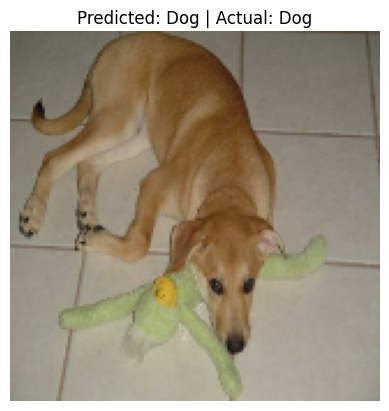

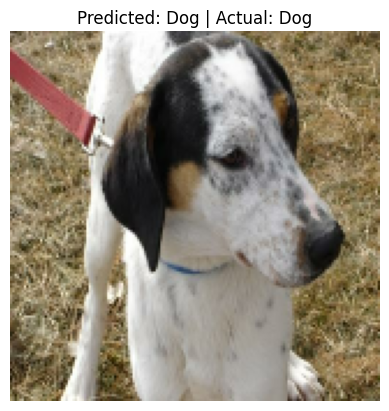

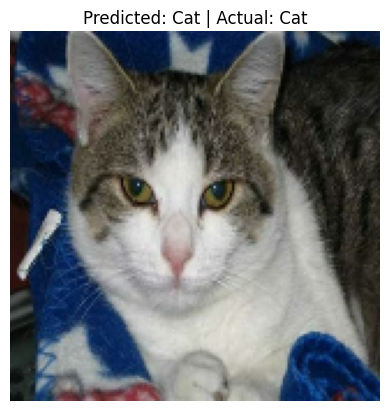

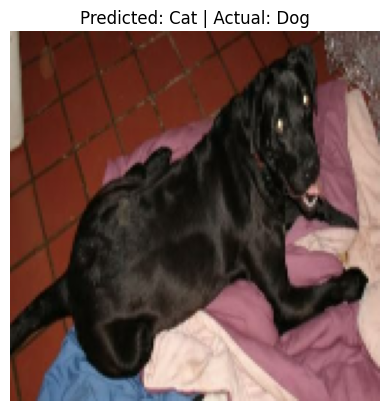

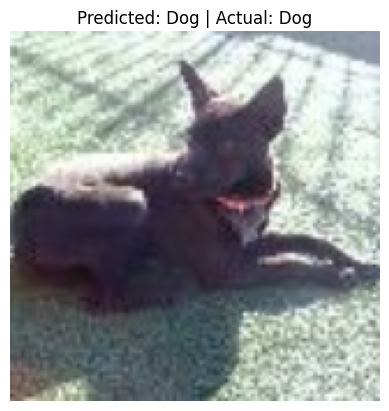

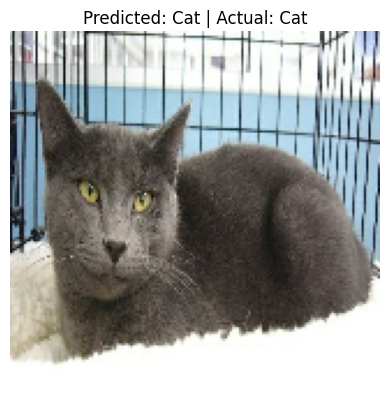

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.pyplot as plt
class_names = ['Cat', 'Dog']

# Load the dataset from TensorFlow Datasets
(raw_train, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

# Image resizing
IMG_SIZE = 160  # All images resized to 160x160

def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # normalize to [0,1]
    return image, label

train = raw_train.map(format_example)
test = raw_test.map(format_example)

# Shuffle and batch
BATCH_SIZE = 32
train_batches = train.shuffle(1000).batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

# Model
model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_batches, epochs=5, validation_data=test_batches)

# for images
for images, labels in test_batches.take(1):
    preds = model.predict(images)
    for i in range(10):  # Show first 10 images in this batch
        plt.imshow(images[i])
        plt.title(f"Predicted: {class_names[int(preds[i] > 0.5)]} | Actual: {class_names[labels[i]]}")
        plt.axis('off')
        plt.show()